# In-Class: Conservation Law Topic

In [1]:
#Import libraries
import numpy
from matplotlib import pyplot
%matplotlib inline

In [15]:
#Define the green light condition
def rho_green_light(x, rho_light):
    """Compute initial condition for green light
    
    x : Locations on the road as a array
    
    rho_light : car density at stoplight
    
    rho : initial car density along the road"""
    
    rho = numpy.zeros_like(x)
    mask = numpy.where(x < 2.0)
    rho[mask] = rho_light * x[mask] / 2.0
    
    return rho

In [16]:
#Set some parameters
nx = 81 #number of locations
L = 4.0 #length of the road
dx = L / (nx - 1) #distance between two consecutive points
nt = 30 #number of time steps
u_max = 1.0 #maximum speed allowed on the road
rho_max = 10.0 #maximum car density allowed on the road
rho_light = 10.0 #car density at the stoplight

#Set the time-step based on CFL limit
sigma = 1.0
dt = sigma * dx / u_max #time-step size
#discertize road
x = numpy.linspace(0.0, L, num=nx)

#Compute the initial traffic density
rho0 = rho_green_light(x, rho_light)

(-0.5, 11.0)

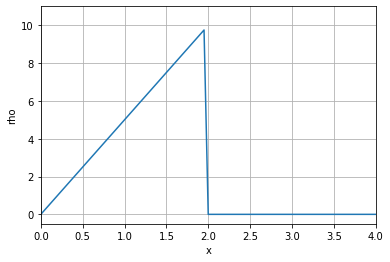

In [17]:
#Plot the initial car density on the road
pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('x')
pyplot.ylabel('rho')
pyplot.grid()
pyplot.plot(x, rho0)
pyplot.xlim(0.0, L)
pyplot.ylim(-0.5, 11.0)

In [18]:
#Traffic flux calculation
def flux(rho, u_max, rho_max):
    """Compute traffic flux F = V * f(rho)
    
    rho : traffic density
    u_max : max speed allowed
    rho_max : max density
    
    F : traffic flux"""
    
    F = rho * u_max * (1.0 - rho / rho_max)
    return F

In [24]:
# forward time/backware space integral scheme

def ftbs(rho0, nt, dt, dx, rho00, u_max, rho_max):
    """returns rho_hist : history of car density"""
    
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    for n in range(nt):
        F = flux(rho, u_max, rho_max)
        rho[0] = rho00
        rho[1:] = rho[1:] - dt / dx * (F[1:] - F[:-1])
        rho_hist.append(rho.copy())
        
    return rho_hist

In [25]:
def plot_solution(nt, rho_hist, x):
    pyplot.figure()
    pyplot.xlabel('x')
    pyplot.ylabel('rho')
    pyplot.grid()
    pyplot.plot(x, rho_hist[0], label = 'Initial')
    pyplot.plot(x, rho_hist[nt], label = 'Current')
    pyplot.legend()
    pyplot.xlim(0.0, L)
    pyplot.ylim(-0.5, 11.0)
    pyplot.show()

In [26]:
#Compute history of numerical solution FTBS
rho_hist = ftbs(rho0, nt, dt, dx, rho0[0], u_max, rho_max)

In [27]:
import ipywidgets

nt_slider = ipywidgets.IntSlider(value=0, min=0, max=nt, step=1, 
                                description='Time Step')
w = ipywidgets.interactive(plot_solution, nt=nt_slider, 
                          rho_hist=ipywidgets.fixed(rho_hist),
                          x=ipywidgets.fixed(x))

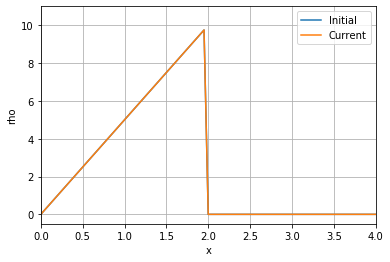

In [28]:
plot_solution(0, rho_hist, x)


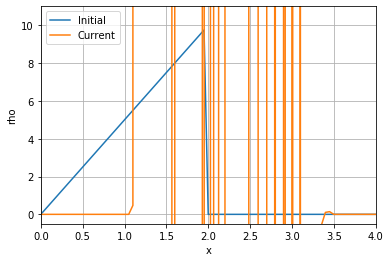

In [29]:
plot_solution(nt, rho_hist, x)

(-0.5, 11.0)

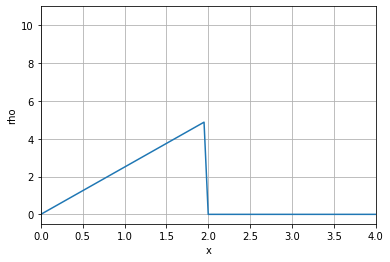

In [36]:
#modify parameters for stability
nt = 40 #number of time steps
rho_light = 5.0 #car density at the stoplight
u_max = 1.0

#Compute initial traffic density
rho0 = rho_green_light(x, rho_light)
#Plot the initial car density on the road
pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('x')
pyplot.ylabel('rho')
pyplot.grid()
pyplot.plot(x, rho0)
pyplot.xlim(0.0, L)
pyplot.ylim(-0.5, 11.0)

In [37]:
rho_hist = ftbs(rho0, nt, dt, dx, rho0[0], u_max, rho_max)

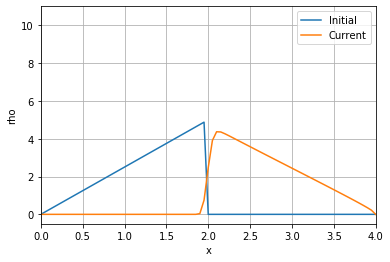

In [38]:
plot_solution(nt, rho_hist, x)